# Problem 2 Logistic Regression

In [220]:
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [279]:
# Use weka to save the arff file as the csv file
# Then read the data from the CSV

disease_data=[]
csv_reader = csv.reader(open('realdata1/chronic_kidney_disease_full.csv', encoding='utf-8'))
for row in csv_reader:
    disease_data.append(row)
print(len(disease_data[1:]))
#print(disease_data[0:2])
arr=np.array(disease_data)
print(arr)

400
[['age' 'bp' 'sg' ..., 'pe' 'ane' 'class']
 ['48' '80' '1.020' ..., 'no' 'no' 'ckd']
 ['7' '50' '1.020' ..., 'no' 'no' 'ckd']
 ..., 
 ['12' '80' '1.020' ..., 'no' 'no' 'notckd']
 ['17' '60' '1.025' ..., 'no' 'no' 'notckd']
 ['58' '80' '1.025' ..., 'no' 'no' 'notckd']]


In [285]:
dataset = DataFrame(arr[1:],columns = arr[0])
dataset.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,?,normal,notpresent,notpresent,100,...,36,?,?,no,no,no,good,no,no,ckd
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


# Data Pre-processing 1

In [293]:
# Deal with missing values
# if feature is num type, replace '?' with mean value
# change nom type to 0/ 1; replace ‘？’ to class with largest amount

typex=['num','num','nom','nom','nom','nom','nom','nom','nom','num','num','num','num','num','num','num','num','num',\
       'nom','nom','nom','nom','nom','nom','nom']
colname = dataset.columns
print(colname)
for i,col in enumerate(dataset.columns):
    #print(i,typex[i])
    if typex[i] == 'num':
        valsum = dataset[colname[i]].apply(lambda x: float(x) if x != '?' else 0).sum()
        valcount =  dataset[colname[i]].apply(lambda x: 1 if x != '?' else 0).sum()
        valavg = (valsum / valcount)
        if colname[i] == 'age' or colname[i] == 'bgr' or colname[i] == 'bu' or colname[i] == 'sod' or colname[i] == 'pcv':
            valavg = (int(valavg))
        elif colname[i] == 'pot' or colname[i] == 'hemo' or colname[i] == 'rbcc':
            valavg = '%.1f' %valavg
        elif colname[i] == 'sc':
            valavg = '%.2f' %valavg
        elif colname[i] == 'bp':
            valavg = int((valavg // 10) * 10)
        elif colname[i] == 'wbcc':
            valavg = int((valavg // 100) * 100)
            
        print(colname[i], valavg)
        dataset[colname[i]] = dataset[colname[i]].replace('?',valavg).astype(float)
                      
    else:
        listval = list(dataset[colname[i]].unique())
        if '?' in listval:
            listval.remove('?')
        listval.sort()
        #print(listval)
        cnt = [0] * len(listval)
        for k in dataset[colname[i]]:
            if k == '?':
                continue
            for j in range(len(listval)):
                if k == listval[j]:
                    cnt[j] += 1
        maxv = 0
        maxidx = -1
        for k in range(len(cnt)):
            if cnt[k] > maxv:
                maxv = cnt[k]
                maxidx = listval[k]
        
        print(colname[i], maxidx)
        dataset[colname[i]] = dataset[colname[i]].replace('?',maxidx)
        for x in range(len(listval)):
            dataset[colname[i]] = dataset[colname[i]].replace(listval[x],float(x))
        dataset[colname[i]] = dataset[colname[i]].astype(float)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')
age 51
bp 70
sg 3.0
al 0.0
su 0.0
rbc 1.0
pc 1.0
pcc 0.0
ba 0.0
bgr 148
bu 57
sc 3.07
sod 137
pot 4.6
hemo 12.5
pcv 38
wbcc 8400
rbcc 4.7
htn 0.0
dm 0.0
cad 0.0
appet 0.0
pe 0.0
ane 0.0
class 0.0


In [294]:
dataset.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,3.0,4.0,0.0,1.0,1.0,0.0,0.0,148.0,...,38.0,6000.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.7,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
X= dataset.drop('class', axis = 1)
y = np.array(dataset['class'])
print(X.shape)
print(y.shape)

(400, 24)
(400,)


In [296]:
# Feature Scaling
# with standardization method
# xi = (xi - mean) / std
# xi will in range[-1,1]

for i,col in enumerate(X.columns):
    valmean = X[col].mean()
    valstd =  X[col].std()
    X[col] = X[col].apply(lambda x: (x - valmean) / valstd )
X.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.204564,0.275487,0.420958,0.076154,-0.379794,0.364433,0.483716,-0.342089,-0.240947,-0.361481,...,1.059206,0.646290,-0.239575,0.589060,1.310262,1.383802,-0.304408,-0.507166,-0.483716,-0.419559
1,-2.619864,-1.943199,0.420958,2.360771,-0.379794,0.364433,0.483716,-0.342089,-0.240947,-0.000435,...,-0.450264,-0.089175,-0.952948,-0.005950,-0.761298,-0.720840,-0.304408,-0.507166,-0.483716,-0.419559
2,0.620172,0.275487,-1.419297,0.837693,2.504716,0.364433,0.483716,-0.342089,-0.240947,3.676890,...,-1.076141,-0.947218,-0.358470,-0.005950,-0.761298,1.383802,-0.304408,1.966813,-0.483716,2.377499
3,-0.204564,-0.464075,-2.339425,2.360771,-0.379794,0.364433,-2.062159,2.915905,-0.240947,-0.414969,...,-0.487080,-0.824640,-0.675525,-0.957967,1.310262,-0.720840,-0.304408,1.966813,2.062159,2.377499
4,-0.027835,0.275487,-1.419297,0.837693,-0.379794,0.364433,0.483716,-0.342089,-0.240947,-0.562062,...,-0.339815,-0.456908,-0.437734,-0.124952,-0.761298,-0.720840,-0.304408,-0.507166,-0.483716,-0.419559


In [297]:
from sklearn.model_selection import train_test_split
X= np.array(X)
y = np.array(dataset['class'])
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 24)
(320,)
(80, 24)
(80,)


# Logistic Regression Algorithm

In [307]:
# This is the implementation of the Logistic Regression

class LR:
    def __init__(self):
        self.dim = 24
        self.w = np.random.random(self.dim)
        #self.w = np.array([1.0]*self.dim)
        self.b = 0
        self.eta = 0.1
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def logistic_regression(self,x,y,eta):
        itr = 0
        self.eta = eta
        m, n = np.shape(x)
        costlist = []
        while itr <= 2000:
            fx = np.dot(self.w, x.T) + self.b
            hx = self.sigmoid(fx)
            cost = 1 / m * np.sum([(-y) * np.log(hx) - (1-y) * np.log(1 - hx)])
            if itr % 50 == 0:
                print('itr = %d, cost = %f' %(itr,cost))
                costlist.append(cost)
            gw=[]; bs = 0
            for j in range(n):
                ws = 0
                for i in range(m):
                    ws += (hx[i] - y[i]) * x[i][j]
                    bs += (hx[i] - y[i])
                gw.append(ws)
            gradient_w = np.array(gw) / n * self.eta
            gradient_b = bs / n *self.eta
            #print(self.w,gradient_w,self.b,gradient_b)
            self.w -= gradient_w
            self.b -= gradient_b  
            itr += 1
        y_t = [1 if i > 0.5 else 0 for i in hx]
        return (y_t, self.w, self.b, costlist)
            

In [308]:
lr = LR()
yy, nw, nb, costlist= lr.logistic_regression(X_train,y_train,eta=0.01)

y_pred = lr.sigmoid(np.dot(nw, X_test.T) + nb)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

print(y_pred)
print(y_test)

itr = 0, cost = 1.796317
itr = 50, cost = 0.113361
itr = 100, cost = 0.077091
itr = 150, cost = 0.062728
itr = 200, cost = 0.054459
itr = 250, cost = 0.048899
itr = 300, cost = 0.044818
itr = 350, cost = 0.041647
itr = 400, cost = 0.039085
itr = 450, cost = 0.036954
itr = 500, cost = 0.035142
itr = 550, cost = 0.033574
itr = 600, cost = 0.032200
itr = 650, cost = 0.030981
itr = 700, cost = 0.029891
itr = 750, cost = 0.028907
itr = 800, cost = 0.028014
itr = 850, cost = 0.027197
itr = 900, cost = 0.026448
itr = 950, cost = 0.025756
itr = 1000, cost = 0.025116
itr = 1050, cost = 0.024521
itr = 1100, cost = 0.023966
itr = 1150, cost = 0.023446
itr = 1200, cost = 0.022959
itr = 1250, cost = 0.022501
itr = 1300, cost = 0.022069
itr = 1350, cost = 0.021661
itr = 1400, cost = 0.021274
itr = 1450, cost = 0.020908
itr = 1500, cost = 0.020560
itr = 1550, cost = 0.020229
itr = 1600, cost = 0.019913
itr = 1650, cost = 0.019611
itr = 1700, cost = 0.019323
itr = 1750, cost = 0.019048
itr = 1800, cos

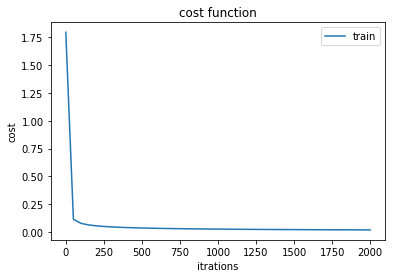

In [311]:
plt.title("cost function")
plt.xlabel("itrations")
plt.ylabel("cost")
plt.plot(np.arange(0, 2050, 50), costlist ,label='train')
plt.legend(loc='best')
plt.show()

In [300]:
from sklearn.metrics import confusion_matrix
result= confusion_matrix(y_test, y_pred)
print(result)

TN, FP, FN, TP = result.ravel()
print(TN,FP,FN,TP)
Pre=TP/(TP+FP)
Rec=TP/(TP+FN)
f_measure= 2*Pre*Rec/(Pre+Rec)
print(f_measure)

[[52  0]
 [ 0 28]]
52 0 0 28
1.0


In [265]:
f_list_train=[]
f_list_test=[]
rg= np.arange(0.01,0.03,0.005)
print(rg)
for i in rg:
    print('i=%f' %i)
    lr = LR()
    yy, nw, nb= lr.logistic_regression(X_train,y_train,eta=i)
    result= confusion_matrix(y_train, yy)
    TN, FP, FN, TP = result.ravel()
    Pre=TP/(TP+FP)
    Rec=TP/(TP+FN)
    f_measure= 2*Pre*Rec/(Pre+Rec)
    print('train f-measure: %f' %f_measure)
    f_list_train.append(f_measure)
    
    y_pred = lr.sigmoid(np.dot(nw, X_test.T) + nb)
    y_pred = [1 if i > 0.5 else 0 for i in y_pred]
    result= confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = result.ravel()
    Pre=TP/(TP+FP)
    Rec=TP/(TP+FN)
    f_measure= 2*Pre*Rec/(Pre+Rec)
    print('test f-measure: %f' %f_measure)
    f_list_test.append(f_measure)

[ 0.01   0.015  0.02   0.025]
i=0.010000
train f-measure: 1.000000
test f-measure: 1.000000
i=0.015000
train f-measure: 1.000000
test f-measure: 1.000000
i=0.020000
train f-measure: 1.000000
test f-measure: 1.000000
i=0.025000
train f-measure: 1.000000
test f-measure: 1.000000


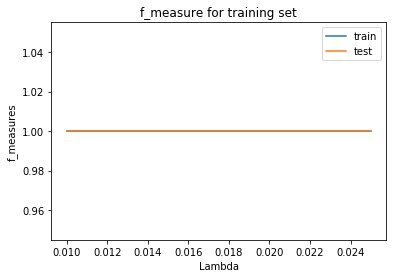

In [267]:
plt.title("f_measure for training set")
plt.xlabel("Lambda")
plt.ylabel("f_measures")
plt.plot(np.arange(0.01,0.03,0.005), f_list_train,label='train')
plt.plot(np.arange(0.01,0.03,0.005), f_list_test,label='test')
plt.legend(loc='best')
plt.show()

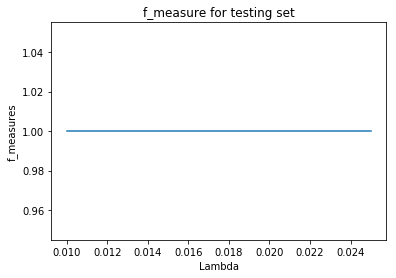

In [269]:
plt.title("f_measure for testing set")
plt.xlabel("Lambda")
plt.ylabel("f_measures")
plt.plot(np.arange(0.01,0.03,0.005), f_list_test)
plt.show()